In [1]:
#importing Libraries
import pandas as pd
import numpy as np

#importing Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loding Dataset and making copy of it
ds2=pd.read_csv('space.csv')
ds2=pd.DataFrame(ds2)
ds=ds2.copy()

In [3]:
#information of dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


We see there are 17 feature columns with various data types int64, float64 and object and 1 target object datatype column.

 Let's see how many examples we have for each category

In [4]:
#checking missing values

ds.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

There is no missing values.

In [5]:
#checking target value datacount
ds["class"].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

The 50% are galaxies, 40% are stars and around 10% objects are QSOs

In [6]:
#seeing column name
ds.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

Some columns are not useful for the classification task. objid and specobjid both of these are just identifers in the original dataset.

Some of the features related to the camera run, rerun, camcol, field. we can also be dropped them

In [7]:
#dropping unnsessary column
ds.drop(["objid","specobjid","run","rerun","camcol","field"], axis = 1, inplace = True)

#checking Columns Again
ds.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'class', 'redshift', 'plate',
       'mjd', 'fiberid'],
      dtype='object')

# Visualation

# Number of samples per class

Text(0, 0.5, 'Count')

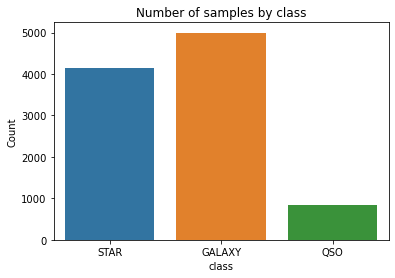

In [8]:
#Plotting Count plot of class

sns.countplot('class', data = ds)
plt.title("Number of samples by class")
plt.ylabel('Count')

We noticed that the quantity of Quasar is much smaller than the other classes

# Density graph


Plots density charts, in which it is possible to check the distribution of the data

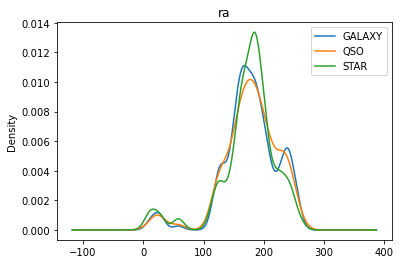

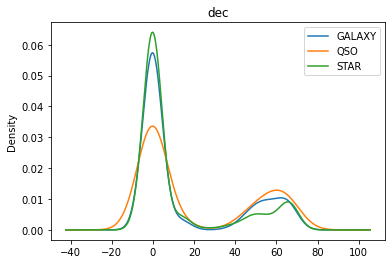

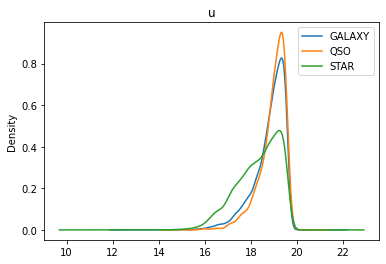

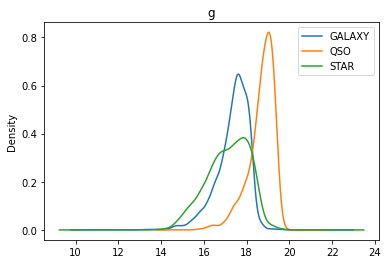

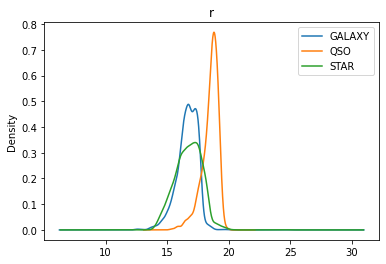

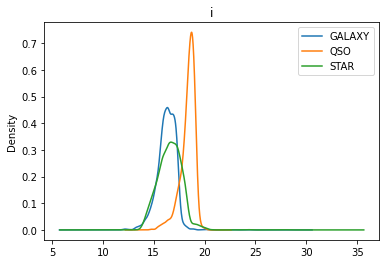

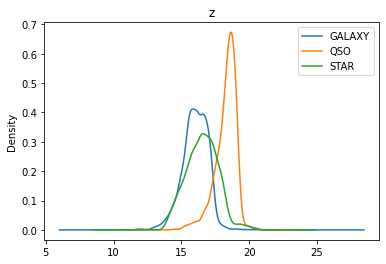

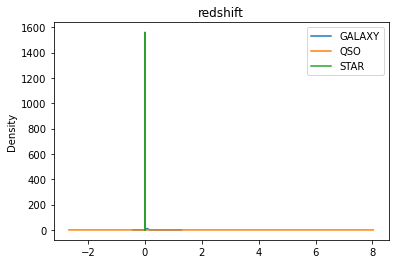

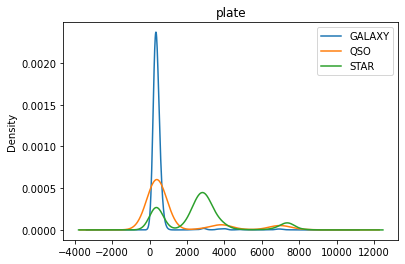

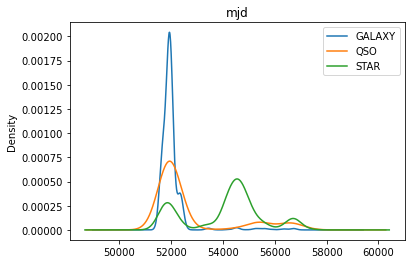

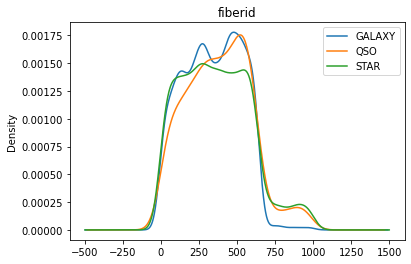

In [9]:
#plotting density curve

for column in ds.columns:
    if column not in ['rerun','class']:
        plt.figure()
        ds.groupby('class')[column].plot.kde()
        plt.title(column)
        plt.legend()

By looking at all the features we see that some of the data sets have skewness.

# Redshift

Redshift tells how far away the celestial body is from the Earth.

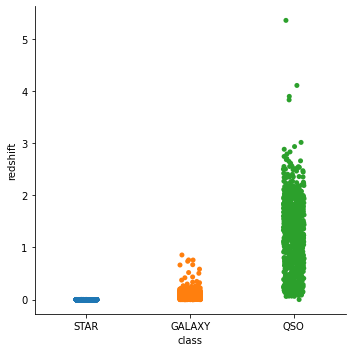

In [10]:
#plotting Catagory plot of redshift
sns.catplot(y='redshift', x='class', data=ds)

Stars have the lowest average redshift, followed by Galaxies and then Quasars

Text(0.5, 1.0, 'STAR')

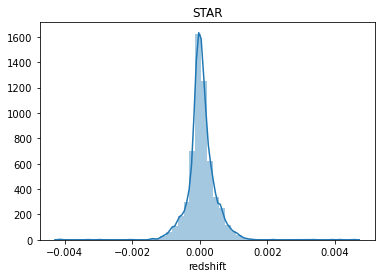

In [11]:
#plotting dist. plot of redshift vs. stars
sns.distplot(ds[ds['class']=='STAR']['redshift'], bins = 50, kde = True)
plt.title('STAR')

Text(0.5, 1.0, 'GALAXY')

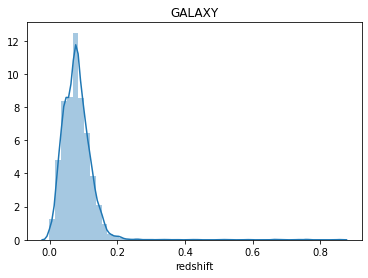

In [12]:
#plotting dist. plot of redshift vs. galaxy
sns.distplot(ds[ds['class']=='GALAXY']['redshift'], bins = 50, kde = True)
plt.title('GALAXY')

Text(0.5, 1.0, 'QSO')

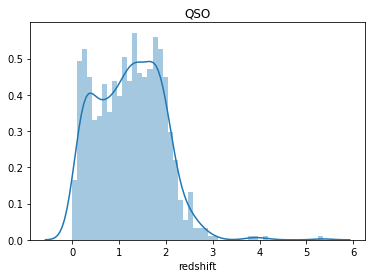

In [13]:
#plotting dist. plot of redshift vs. qso
sns.distplot(ds[ds['class']=='QSO']['redshift'], bins = 50, kde = True)
plt.title('QSO')

Observation

1. Quasars are the furthest from Earth.
2. Graph of qso, is more than galaxy and graph of galaxy is more than the stars which shows us their relative distance.

# Plotting Wavelenghts


"U" stands for ultraviolet. "G" stands for green. "R" stands for red. "I" stands for infrared.

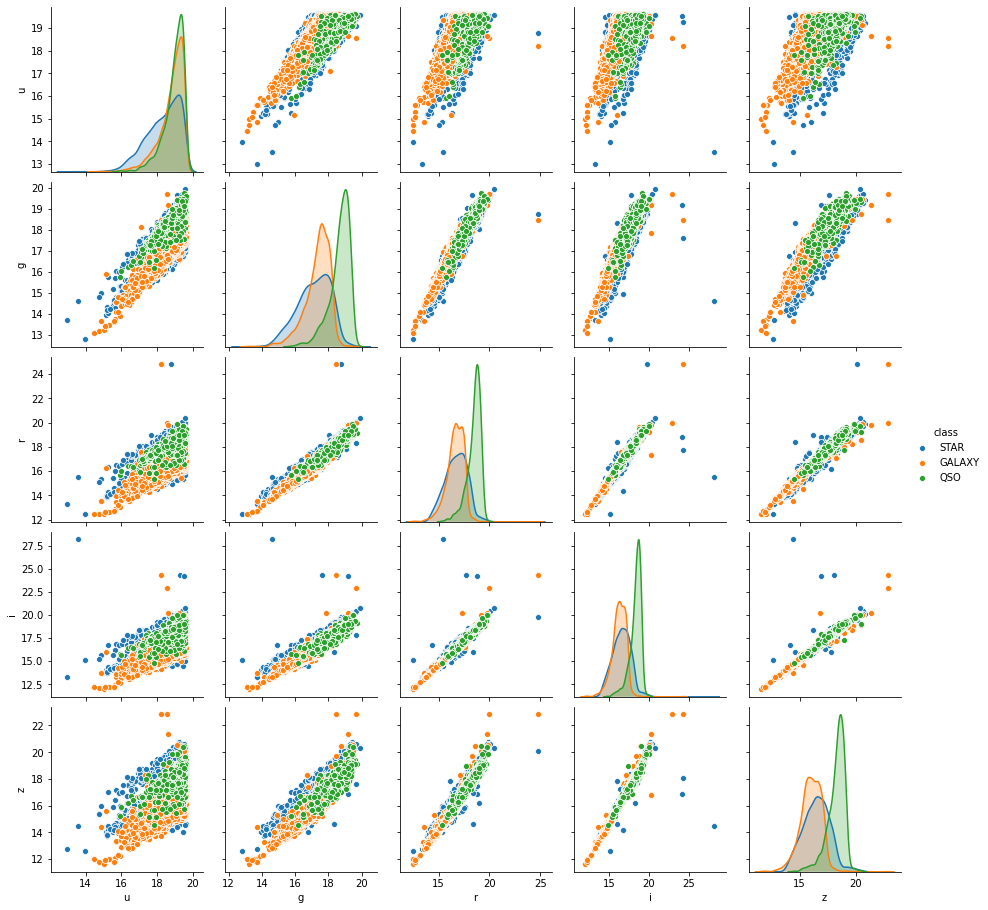

In [14]:
sns.pairplot(ds.loc[:,["u", "g", "r", "i", "z", "class"]], hue = "class")

U,G,R,I,Z correlation looks in accordance with expected physical behaviour - Hotter objects emit more of every wavelength.

 u, g, r, i, z represents the response of the 5 bands of the telescope.
 
 

# Encoding

In [15]:
#Encoding columns with catagorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ds['class'] = le.fit_transform(ds['class'])

# Correlation

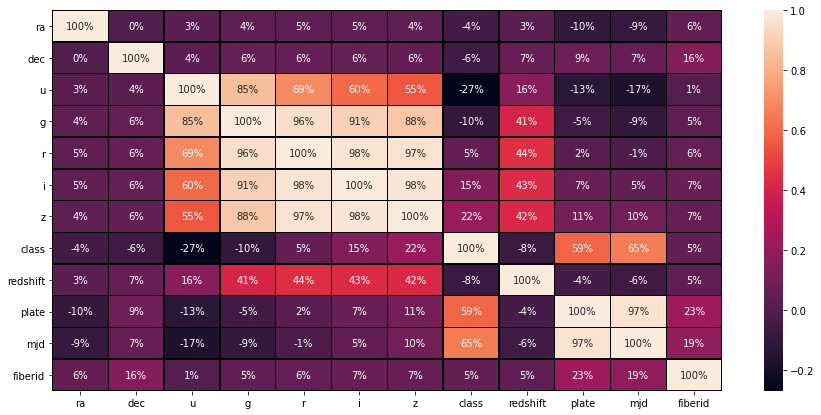

In [16]:
#Correlation Heatmap
plt.figure(figsize=(15,7))
sns.heatmap(ds.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.0%')

High Correlation with class = mjd and plate

Mild Correlation with sales = i, z

Low Correlation with sales = fiberid, redshift, , r, g, u dec, ra

# Buliding Model

In [17]:
#Making X and Y variables
x=ds.drop('class', axis=1)
y=ds['class']

In [18]:
#Stndard Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [19]:
#ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split, GridSearchCV

#metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [20]:
#testing Different Models
model=[LogisticRegression(),SVC(), DecisionTreeClassifier(), KNeighborsClassifier(),GaussianNB()]

x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=42, test_size=0.20)

for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i)
    print(i.score(x_train,y_train))
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print()
    print('..................................................................................................................')

LogisticRegression()
0.977625
0.972
[[959   2  35]
 [  8 182   0]
 [  7   4 803]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       996
           1       0.97      0.96      0.96       190
           2       0.96      0.99      0.97       814

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000


..................................................................................................................
SVC()
0.971
0.964
[[955   2  39]
 [ 10 177   3]
 [ 18   0 796]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       996
           1       0.99      0.93      0.96       190
           2       0.95      0.98      0.96       814

    accuracy                           0.96      2000
   macro avg       0.97      0.96      0.96      2000
weighted avg       0.96      0.

In [21]:
#Hyper Parameter Tuning

#Grid Search 
dtc_para= {'criterion': ['gini' , 'entropy']}

dtcgd=GridSearchCV( estimator=DecisionTreeClassifier() ,param_grid=dtc_para ,scoring='accuracy' ,cv=5)
dtcgd.fit(x,y)
best_para=dtcgd.best_params_
best_score=dtcgd.best_score_
print(best_para)
print(best_score)



{'criterion': 'entropy'}
0.9868


In [22]:
#Finding best random score
max_ac_score=0
dtc=DecisionTreeClassifier(criterion='entropy')
for r_state in range(35,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=r_state, test_size=0.20)
    dtc.fit(x_train,y_train)
    preddtc=dtc.predict(x_test)
    acc_score=accuracy_score(y_test,preddtc)
    if acc_score>max_ac_score:
        max_ac_score=acc_score
        final_rs=r_state
print('max accuracy score corrosponding to' ,final_rs ,'is', max_ac_score)

max accuracy score corrosponding to 44 is 0.9925


In [23]:
#Cross Valadation
from sklearn.model_selection import cross_val_score
cross_val_score(dtc,x,y,cv=5).mean()

0.986

1. As our accuracy score is 99%
2. cross valadation score is 98% 
Hence, no boosing is required

In [24]:
#Saving best Model
import joblib
joblib.dump(dtc,"space.pkl")

['space.pkl']